In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data extraction - drug release curves

In [4]:
# results of best zero-shot model

RF = pd.read_pickle("NESTED_CV_RESULTS/14_feat_RF.pkl", compression='infer', storage_options=None)

In [5]:
RF.head(2)

,Iter,Valid Score,Test Score,Model Parms,DP_Groups,Experimental Index,Time,Experimental_Release,Predicted_Release,Score_difference
0,5,0.156513,0.153386,"{'oob_score': True, 'n_estimators': 400, 'min_...","[HPA-PLGA, HPA-PLGA, HPA-PLGA, HPA-PLGA, HPA-P...","[102, 102, 102, 102, 102, 102, 102, 102, 102, ...","[0.0, 0.0516219, 0.98486, 1.95687, 3.94848, 6....","[0.0, 0.0168018, 0.414559, 0.526319, 0.671316,...","[0.0, 0.0760808956601571, 0.21453372310882338,...",0.003127
1,8,0.174547,0.171272,"{'oob_score': True, 'n_estimators': 100, 'min_...","[ACE-PVL-co-PAVL, ACE-PVL-co-PAVL, ACE-PVL-co-...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 26, 26, 2...","[0.0, 0.239260707111426, 0.310042987659256, 0....","[0.0, 0.099562670858161, 0.312973194535248, 0....","[0.0, 0.12887423826876224, 0.13830556854441203...",0.003275


In [6]:
def test_extraction(df, n):
    
    '''
    Function to extract data from results of the NESTED_CV experiments,
    then return the results for the indicated nested loop - these are ranked in order of score_differeent,
    where score difference is: inner_loop MAE (i.e., valid score) - outer loop MAE (i.e., test score)
    
    Takes arguments: (i) model_name and (ii) sorted nested loop number (i.e., "n")
    '''
    
    dataframe = pd.DataFrame(df['Time'][n], columns=['Time']) 
    dataframe['Experimental_Release'] = df['Experimental_Release'][n]
    dataframe['Predicted_Release'] = df['Predicted_Release'][n]
    #dataframe['Variance'] = dataframe['Variance'][n]
    dataframe['Experimental Index'] = df['Experimental Index'][n]
    dataframe['DP_Groups'] = df['DP_Groups'][n]
    
    return dataframe



## Outer loop #1

# Drug Release Curves

In [7]:
RF_test = test_extraction(RF, 0)
RF_test

,Time,Experimental_Release,Predicted_Release,Experimental Index,DP_Groups
0,0.000000,0.000000,0.000000,102,HPA-PLGA
1,0.051622,0.016802,0.076081,102,HPA-PLGA
2,0.984860,0.414559,0.214534,102,HPA-PLGA
3,1.956870,0.526319,0.366688,102,HPA-PLGA
4,3.948480,0.671316,0.538419,102,HPA-PLGA
...,...,...,...,...,...
659,6.920690,0.456151,0.418529,108,TMZ-PLGA
660,14.102300,0.606239,0.750543,108,TMZ-PLGA
661,21.095600,0.812382,0.881146,108,TMZ-PLGA
662,27.986300,0.958191,0.901736,108,TMZ-PLGA


In [8]:
len(RF_test["DP_Groups"].unique())

7

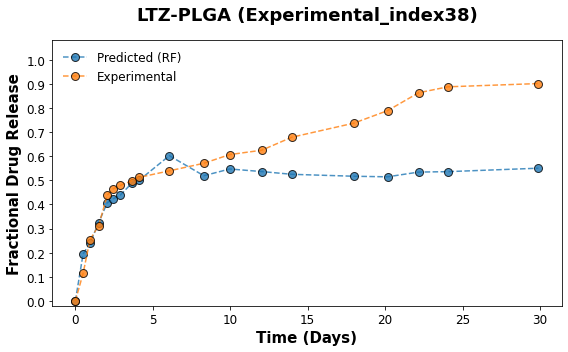

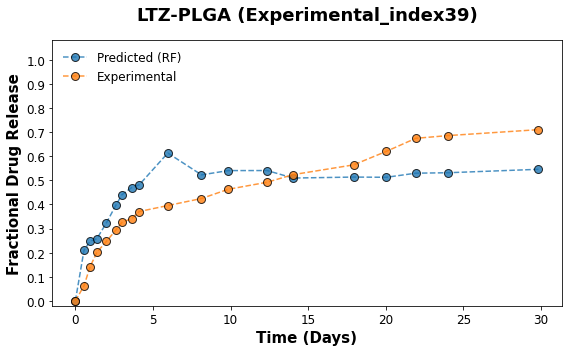

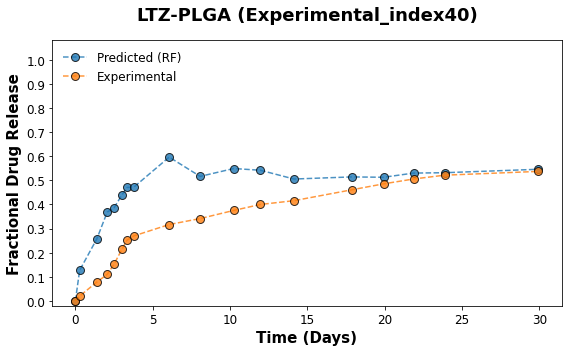

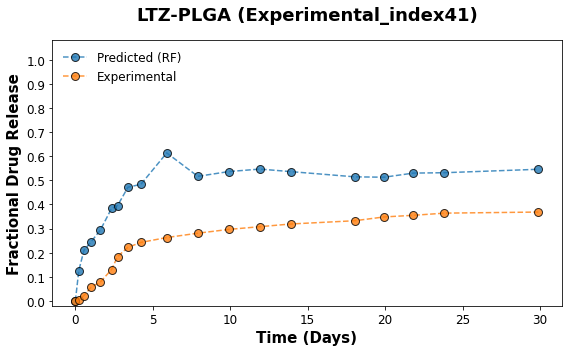

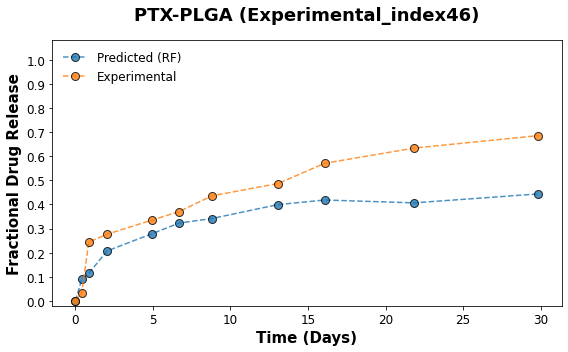

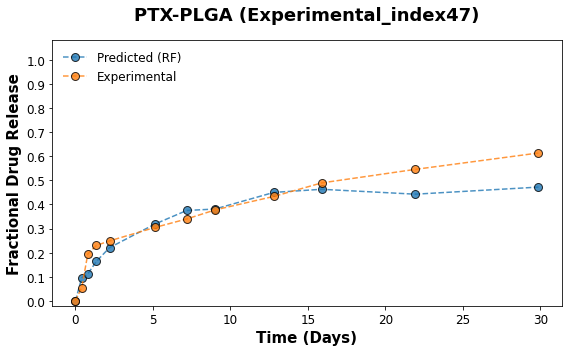

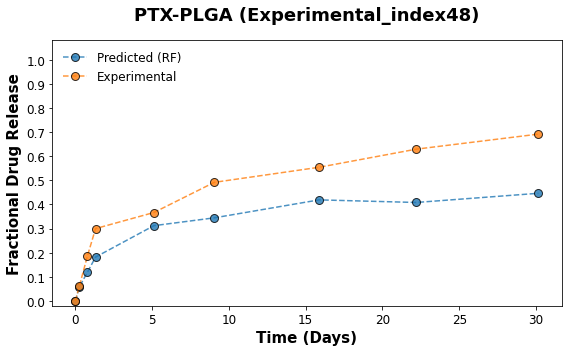

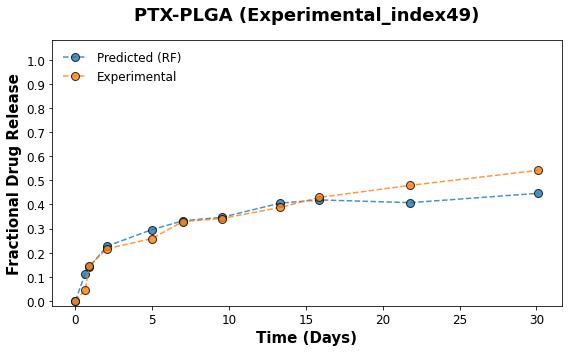

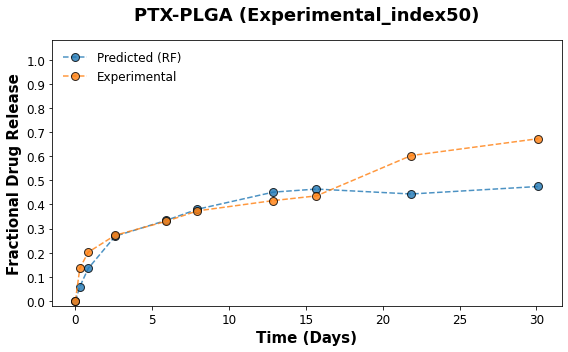

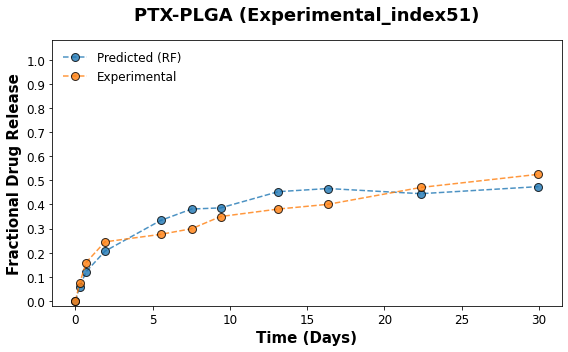

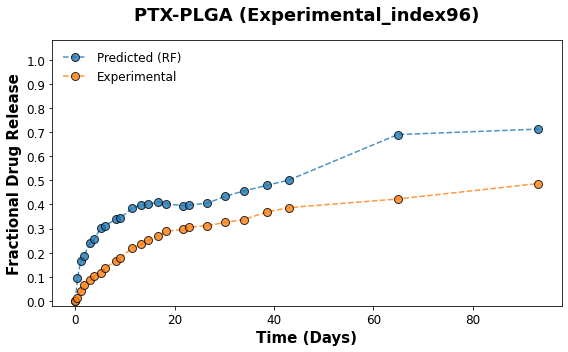

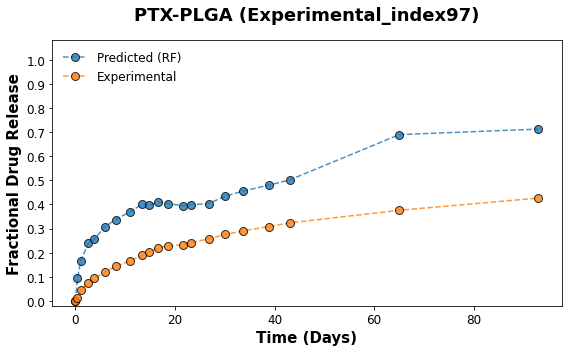

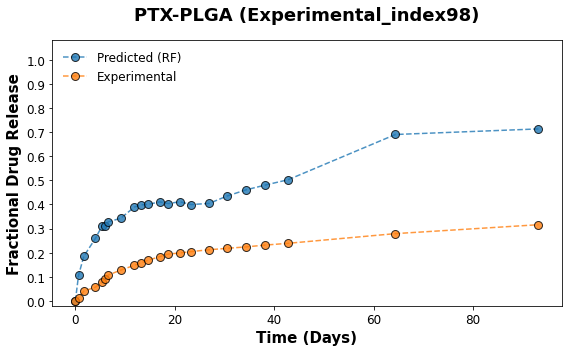

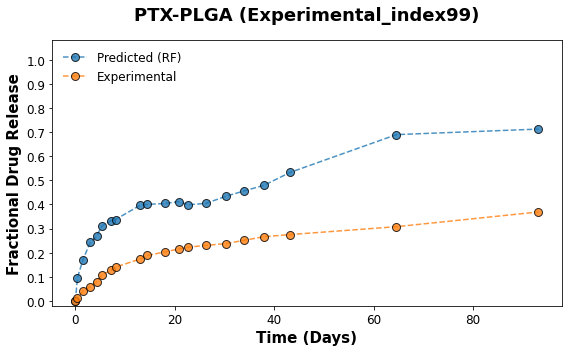

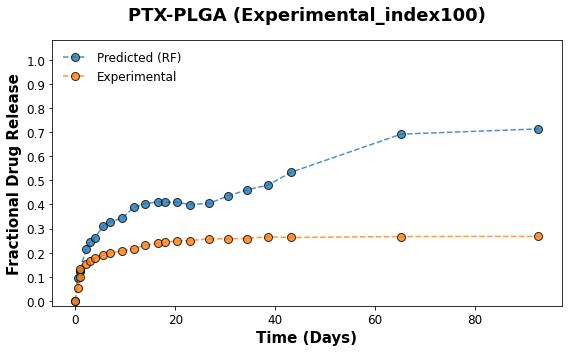

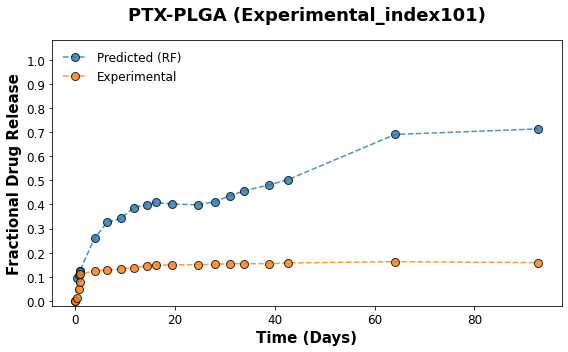

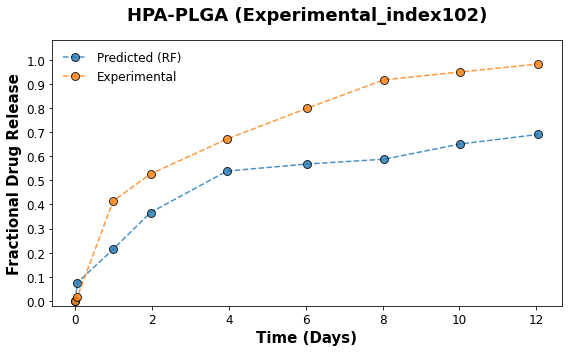

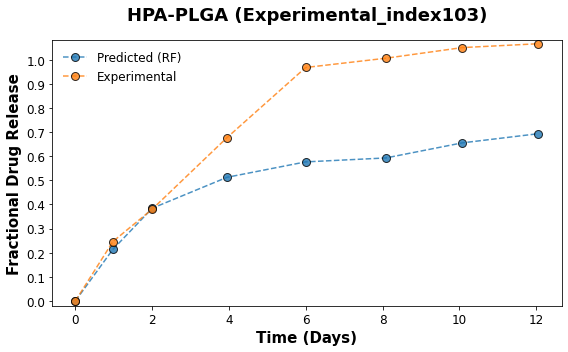

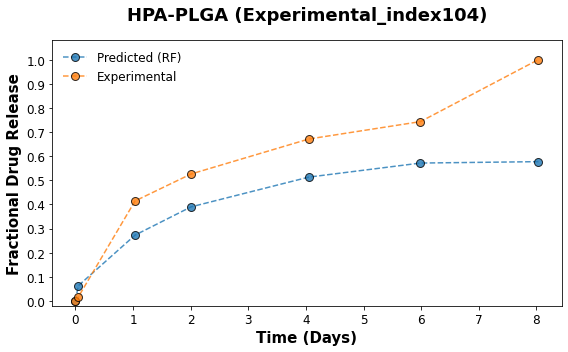

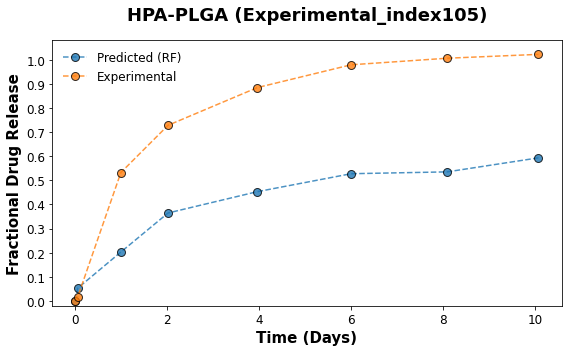

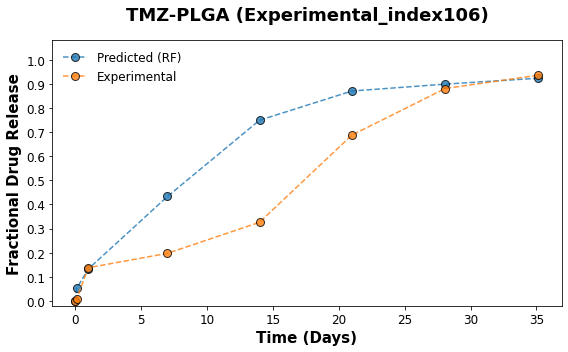

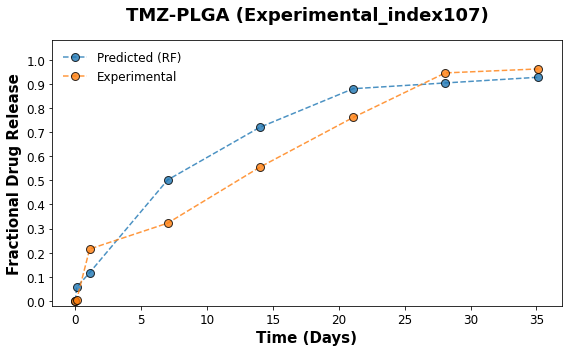

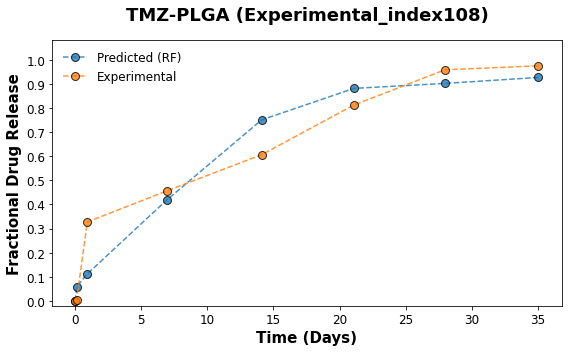

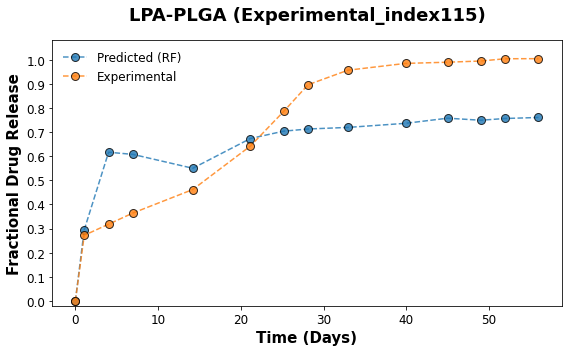

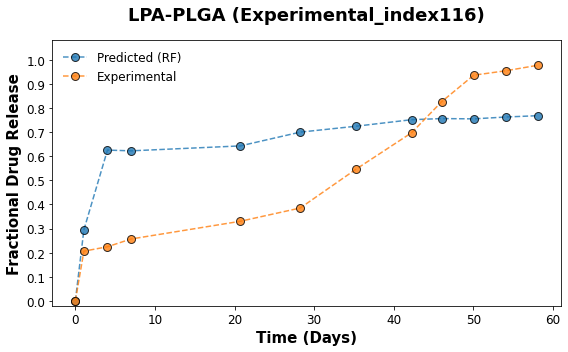

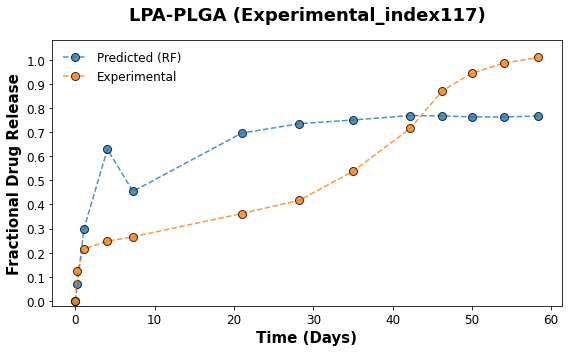

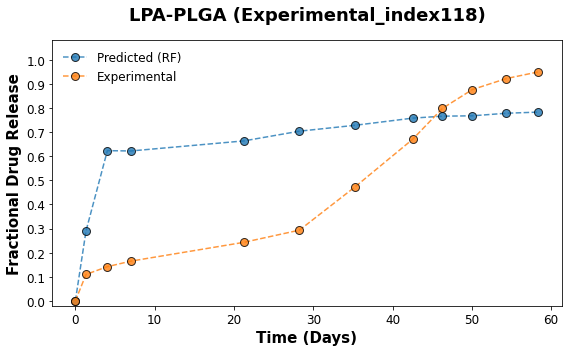

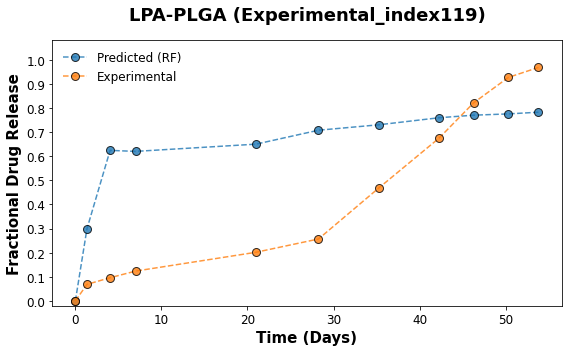

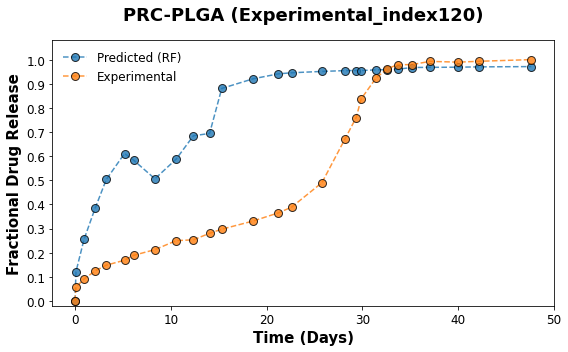

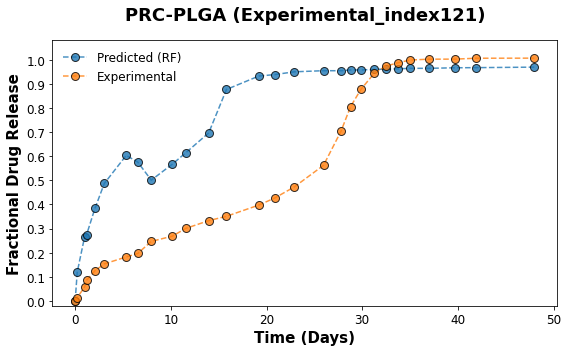

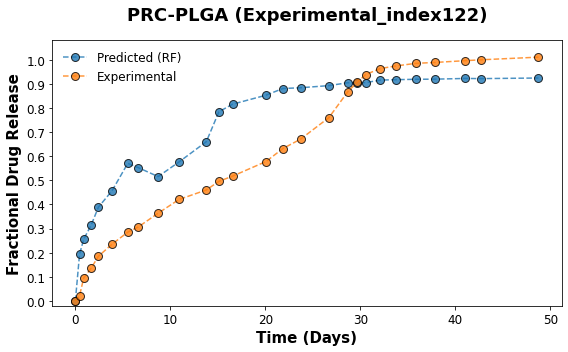

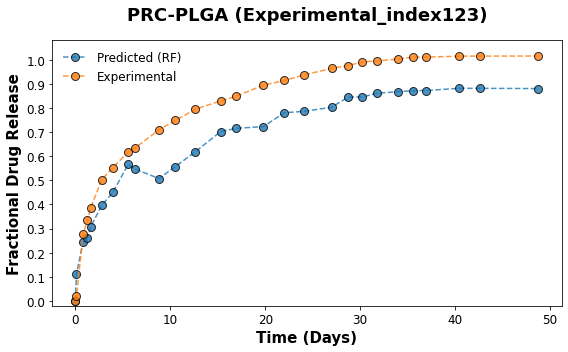

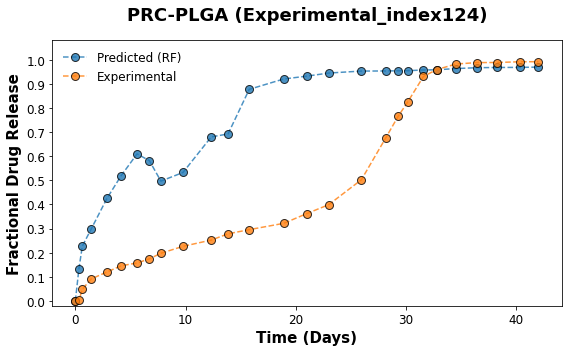

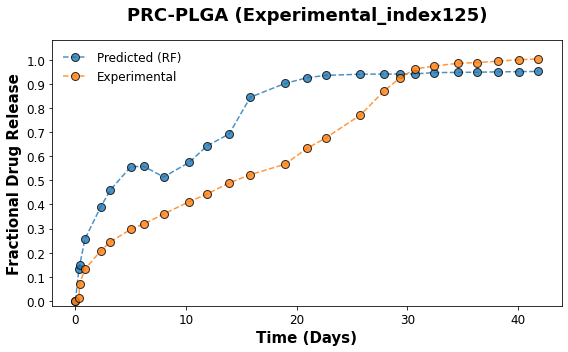

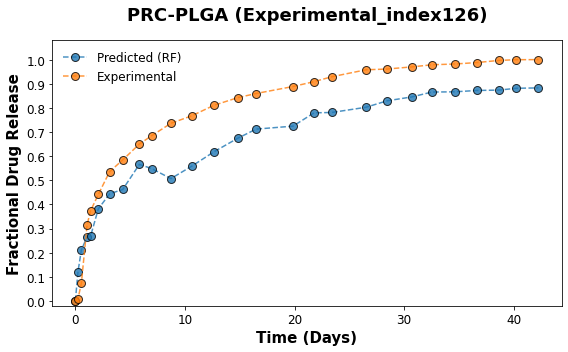

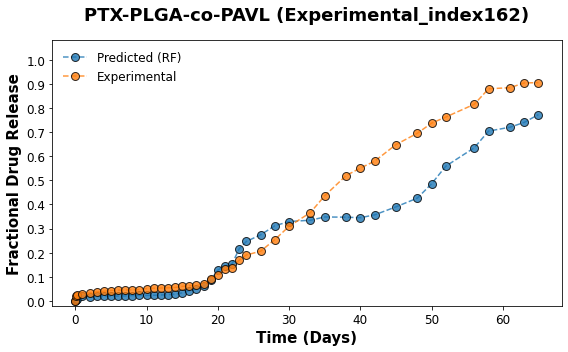

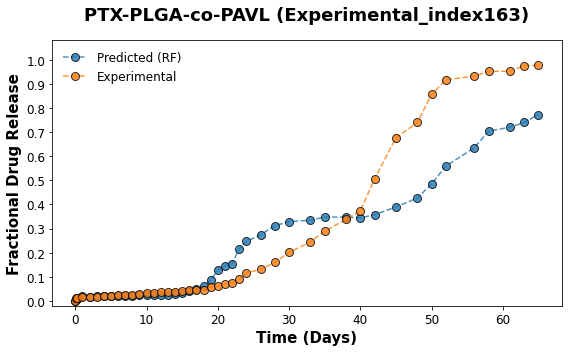

In [9]:
#group dataframe by experimental index
grouped = RF_test.groupby('Experimental Index')

#generate predicted versus experimental drug release profiles for the test set
for name, group in grouped:
    X1 = group['Time']
    Y1 = group['Predicted_Release']
    X2 = group['Time']
    Y2 = group['Experimental_Release']
    #Y1_err=group['Variance']
    
    dp = group['DP_Groups'].iloc[1]
    
    # Compute upper and lower bounds using chosen uncertainty measure: here
    # it is a fraction of the standard deviation of measurements at each
    # time point based on the unbiased sample variance
    #lower = Y1 - Y1_err
    #upper = Y1 + Y1_err

    fig, ax = plt.subplots(figsize=(8,5))
    
    ax.plot(X1, Y1, label='Predicted (RF)', linestyle='--', marker='o', markersize=8, 
            markeredgecolor="black", alpha=0.8)
    #ax.plot(X1, lower, color='tab:blue', alpha=0.2)
    #ax.plot(X1, upper, color='tab:blue', alpha=0.2)
    #ax.fill_between(X1, lower, upper, alpha=0.3, label='Variance')
    
    ax.plot(X2, Y2, label='Experimental', linestyle='--', marker='o', markersize=8, 
            alpha=0.8, markeredgecolor="black")
    
    
    # y-axis limits and interval
    ax.set(ylim=(-0.02, 1.08), yticks=np.arange(0,1.08,0.1))
    ax.set_xlabel('Time (Days)', fontsize=15, color = 'black', weight='bold')
    ax.set_ylabel('Fractional Drug Release', fontsize=15, color = 'black', weight='bold')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_title(str(dp)+' (Experimental_index'+str(name)+')', color = 'black', weight='bold', 
                 fontsize=18, pad = 20)
    ax.legend(loc='upper left', frameon=False, prop={'size': 12})
    ax.grid(False)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # x-axis and y-axis tick color
    ax.tick_params(colors='black')  # 'both' refers to minor and major axes
    
    plt.tight_layout()
    
    #plt.savefig('Figures/Figure_3/LGBM_release_EXP-INDEX'+str(name), dpi=600, format = 'png', transparent=False)
    
    plt.show()

/var/folders/mt/yx95qrc52gd2lj_yvl2b3wfw0000gp/T/ipykernel_26623/3622655366.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(5,5))


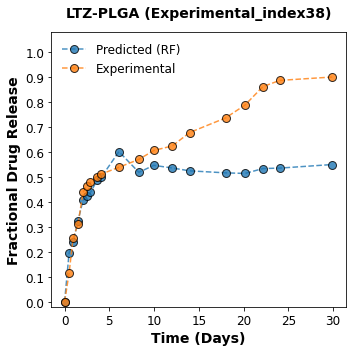

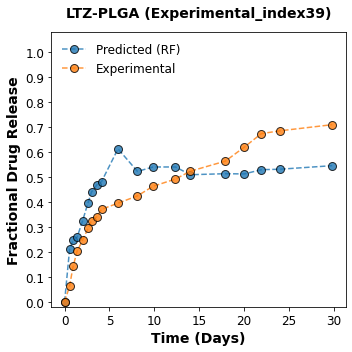

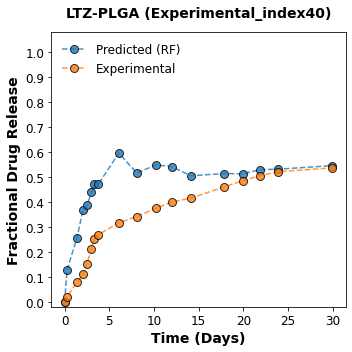

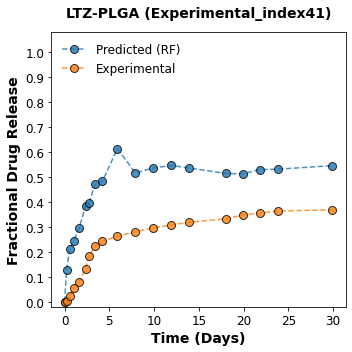

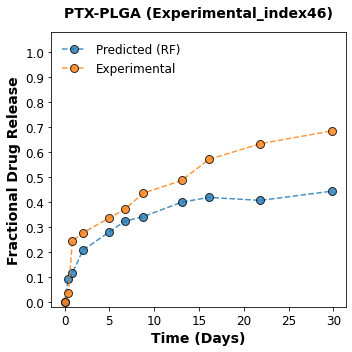

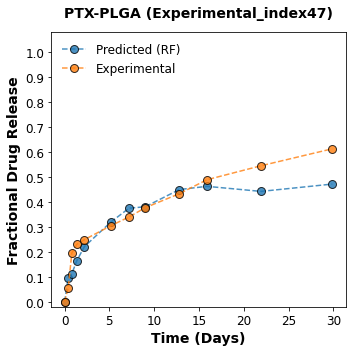

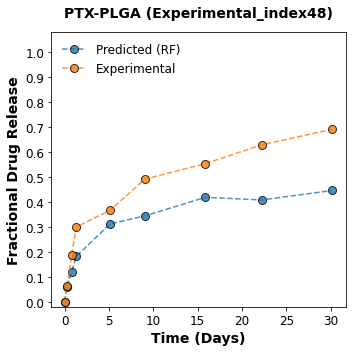

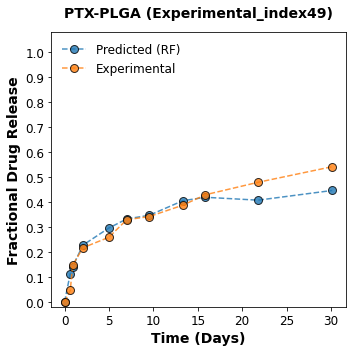

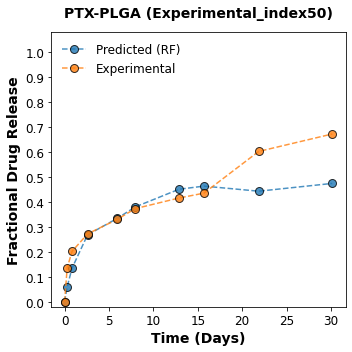

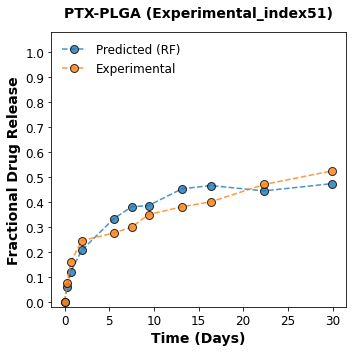

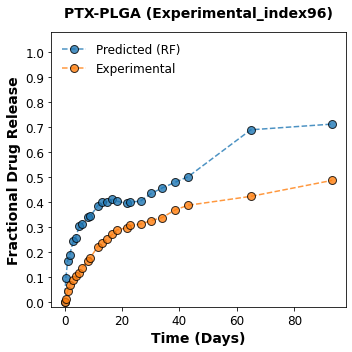

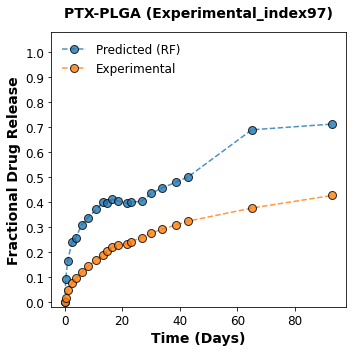

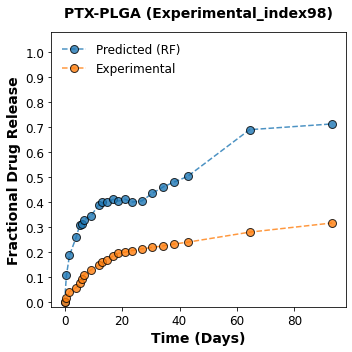

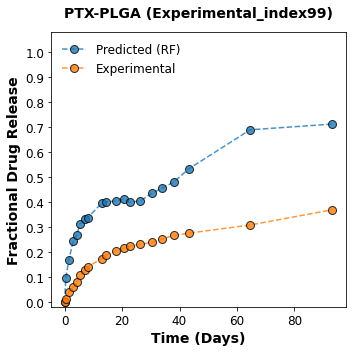

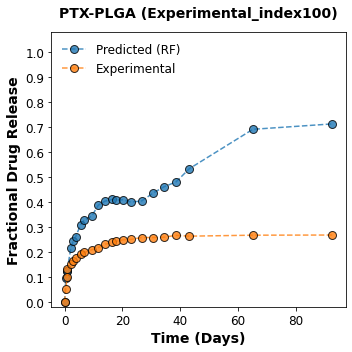

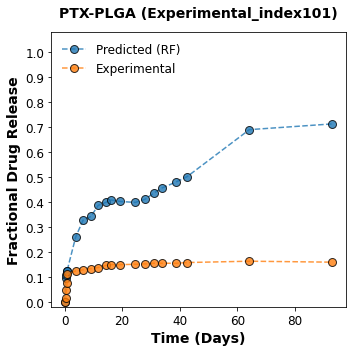

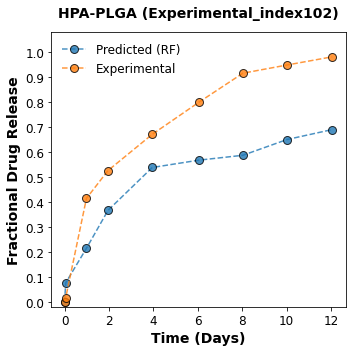

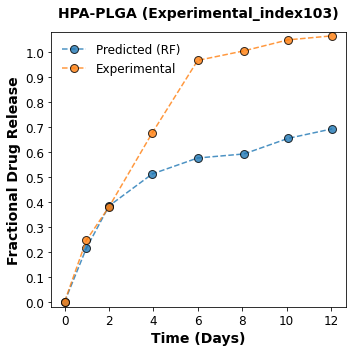

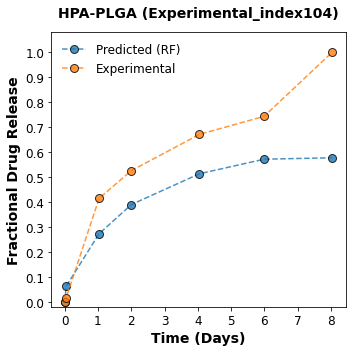

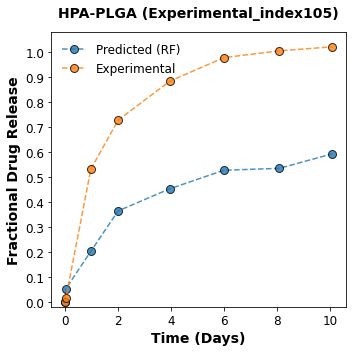

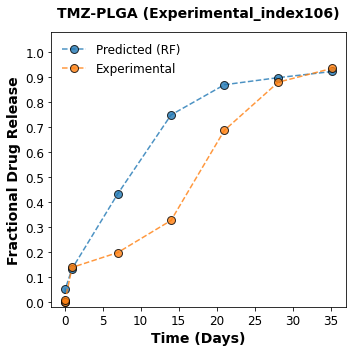

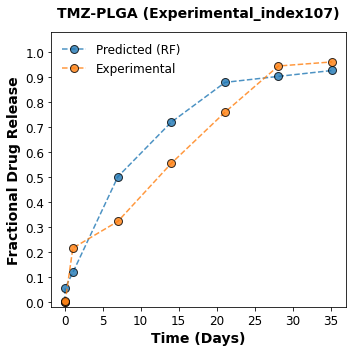

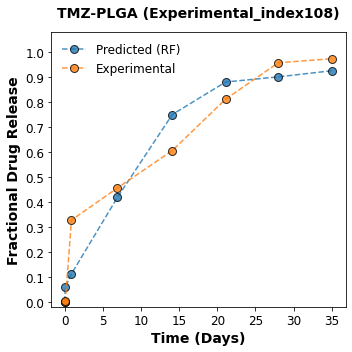

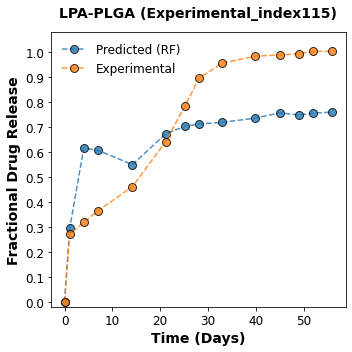

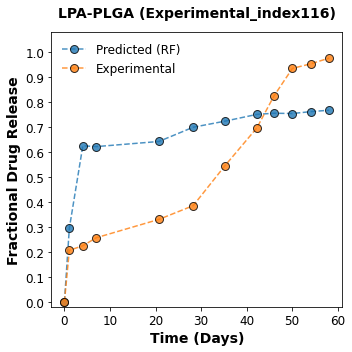

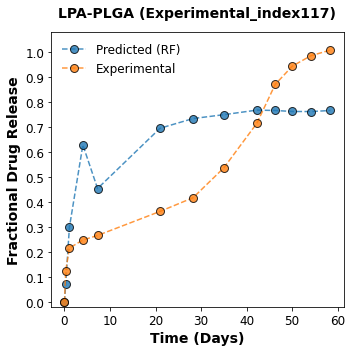

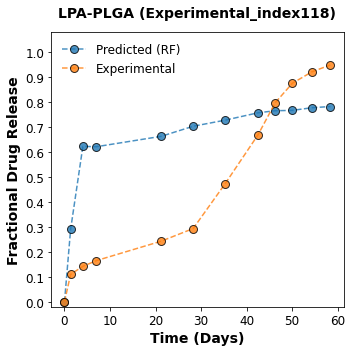

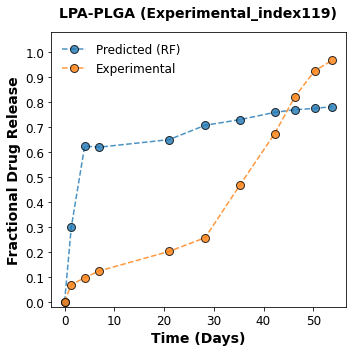

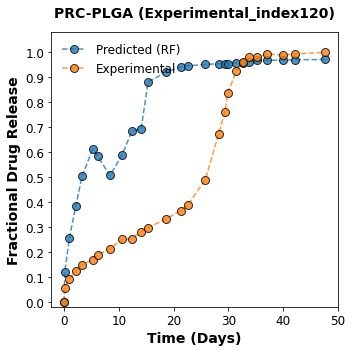

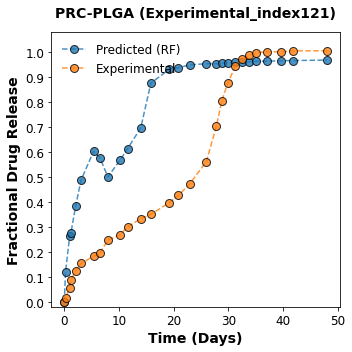

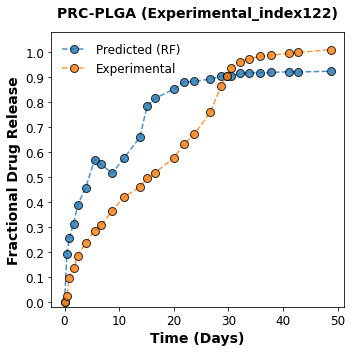

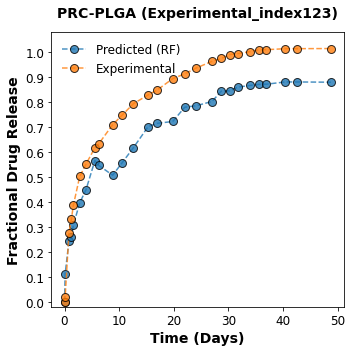

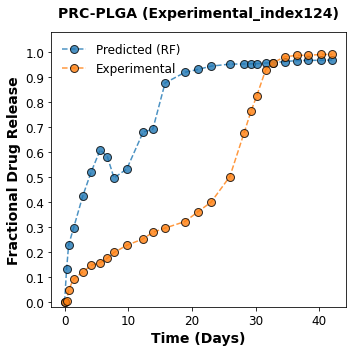

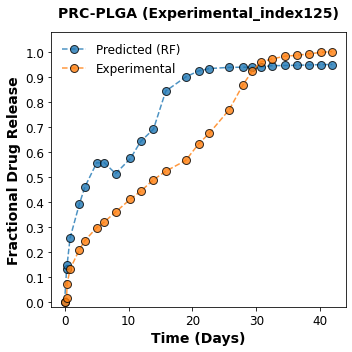

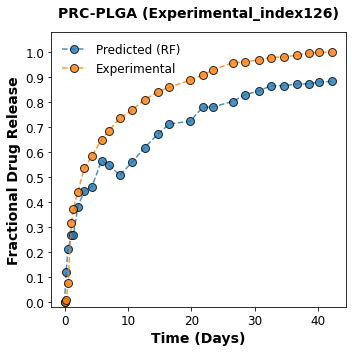

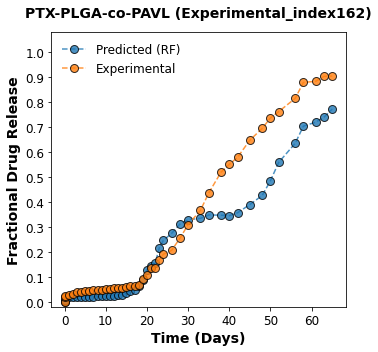

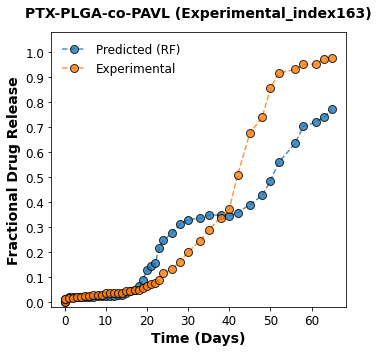

In [11]:
#group dataframe by experimental index
grouped = RF_test.groupby('Experimental Index')

#generate predicted versus experimental drug release profiles for the test set
for name, group in grouped:
    X1 = group['Time']
    Y1 = group['Predicted_Release']
    X2 = group['Time']
    Y2 = group['Experimental_Release']
    #Y1_err=group['Variance']
    
    dp = group['DP_Groups'].iloc[1]
    
    # Compute upper and lower bounds using chosen uncertainty measure: here
    # it is a fraction of the standard deviation of measurements at each
    # time point based on the unbiased sample variance
    #lower = Y1 - Y1_err
    #upper = Y1 + Y1_err

    fig, ax = plt.subplots(figsize=(5,5))
    
    ax.plot(X1, Y1, label='Predicted (RF)', linestyle='--', marker='o', markersize=8, 
            markeredgecolor="black", alpha=0.8)
    #ax.plot(X1, lower, color='tab:blue', alpha=0.2)
    #ax.plot(X1, upper, color='tab:blue', alpha=0.2)
    #ax.fill_between(X1, lower, upper, alpha=0.3, label='Variance')
    
    ax.plot(X2, Y2, label='Experimental', linestyle='--', marker='o', markersize=8, 
            alpha=0.8, markeredgecolor="black")
    
    
    # y-axis limits and interval
    ax.set(ylim=(-0.02, 1.08), yticks=np.arange(0,1.08,0.1))
    ax.set_xlabel('Time (Days)', fontsize=14, color = 'black', weight='bold')
    ax.set_ylabel('Fractional Drug Release', fontsize=14, color = 'black', weight='bold')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_title(str(dp)+' (Experimental_index'+str(name)+')', color = 'black', weight='bold', 
                 fontsize=14, pad = 15)
    ax.legend(loc='upper left', frameon=False, prop={'size': 12})
    ax.grid(False)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # x-axis and y-axis tick color
    ax.tick_params(colors='black')  # 'both' refers to minor and major axes
    
    plt.tight_layout()
    
    plt.savefig('Figures/Figure_3/zero-shot_RF_release_EXP-INDEX'+str(name)+"__2", dpi=600, format = 'png', transparent=False)
    
    #plt.show()